<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/STOCKS_PRICES_PREDICTION_USING_DIFFERENT_ML_MODELS%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

This report presents the findings from applying multiple machine learning models to predict stock prices using historical data. The dataset provided contains stock data for the past five years, including features such as Open, High, Low, Close, and Volume. The models evaluated include Linear Regression, Random Forest, Support Vector Machines (SVM), and Long Short-Term Memory (LSTM) networks.

Data Preprocessing and Exploratory Data Analysis

The data was preprocessed to handle missing values, and additional features were engineered based on the date (Year, Month, Day). Exploratory Data Analysis (EDA) revealed significant correlations between the features, particularly between the Open, High, Low, and Close prices, which guided the selection of features for model training.

In [63]:
import pandas as pd
import numpy as np


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')


In [65]:
df = pd.read_csv("/content/sample_data/SMCI.csv")

In [66]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-08,18.870001,18.870001,18.610001,18.610001,18.610001,5100
1,2019-07-09,18.620001,18.840000,18.500000,18.650000,18.650000,80600
2,2019-07-10,18.740000,19.299999,18.500000,19.200001,19.200001,42500
3,2019-07-11,19.400000,19.400000,18.730000,18.850000,18.850000,41400
4,2019-07-12,18.799999,18.990000,18.580000,18.580000,18.580000,40800


Exploratory Data Analysis (EDA)


In [67]:
# Check for missing values
print(df.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [68]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    147.097138   152.007806   142.243084   147.240119   147.240119   
std     242.192966   251.288218   232.016842   241.777740   241.777740   
min      15.820000    16.990000    15.760000    15.980000    15.980000   
25%      28.757500    29.319999    28.237500    28.825000    28.825000   
50%      40.315000    41.065000    39.619999    40.405000    40.405000   
75%     105.037498   107.787502   101.642500   105.350000   105.350000   
max    1212.000000  1229.000000  1122.339966  1188.069946  1188.069946   

             Volume  
count  1.258000e+03  
mean   1.643197e+06  
std    3.165977e+06  
min    1.300000e+03  
25%    1.951250e+05  
50%    3.813000e+05  
75%    1.707675e+06  
max    3.380240e+07  


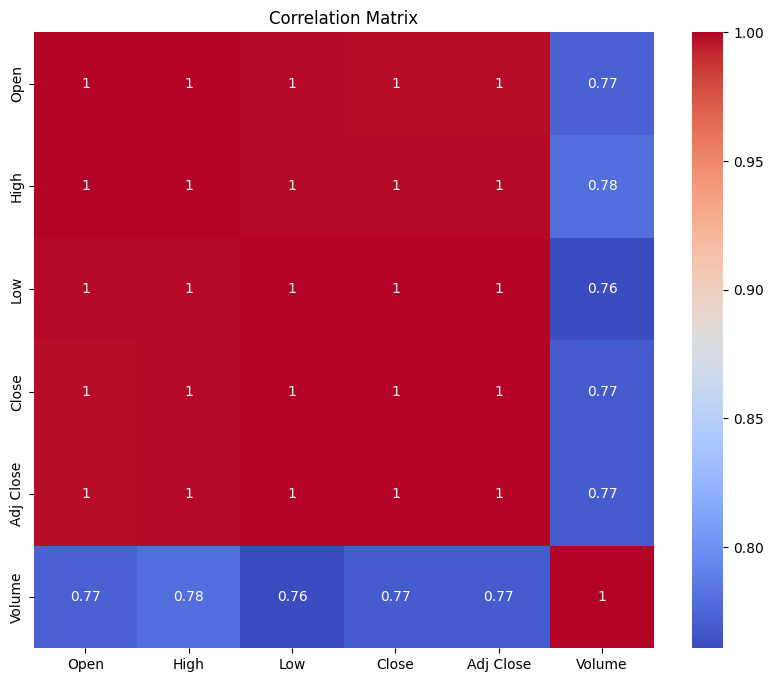

In [69]:
df['Date'] = pd.to_datetime(df['Date'])

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature **Engineering

In [70]:
df.set_index('Date', inplace=True)

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day

In [71]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Date,,,,,,,,,
2019-07-08,18.870001,18.870001,18.610001,18.610001,18.610001,5100,2019,7,8
2019-07-09,18.620001,18.840000,18.500000,18.650000,18.650000,80600,2019,7,9
2019-07-10,18.740000,19.299999,18.500000,19.200001,19.200001,42500,2019,7,10
2019-07-11,19.400000,19.400000,18.730000,18.850000,18.850000,41400,2019,7,11
2019-07-12,18.799999,18.990000,18.580000,18.580000,18.580000,40800,2019,7,12


In [85]:
# prompt: show me coloumn of 3 july 2024

df.loc['2024-07-03'] # Access the row with the date '2024-07-03'

Open         8.371900e+02
High         8.571900e+02
Low          8.210100e+02
Close        8.470000e+02
Adj Close    8.470000e+02
Volume       3.197900e+06
Year         2.024000e+03
Month        7.000000e+00
Day          3.000000e+00
Name: 2024-07-03 00:00:00, dtype: float64

In [86]:
# prompt: show me the whole row of 3 july 2024

df.loc['2024-07-03']


Open         8.371900e+02
High         8.571900e+02
Low          8.210100e+02
Close        8.470000e+02
Adj Close    8.470000e+02
Volume       3.197900e+06
Year         2.024000e+03
Month        7.000000e+00
Day          3.000000e+00
Name: 2024-07-03 00:00:00, dtype: float64

In [92]:
# prompt: make sure you split the data in such a way that all 2024 dates data should come in training data

train_data = df[df.index.year < 2024]
test_data = df[df.index.year == 2024]


In [93]:
X = df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Selection and Training

Linear Regression


In [94]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression
MSE: 26.356000418959848
R2 Score: 0.9994960448313096


In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression
MSE: 27.78064819645757
R2 Score: 0.9994295595364084


In [87]:
# prompt: show me the predicted value of 3 july 2024

future_date = pd.to_datetime('2024-07-03')

future_features = pd.DataFrame({
    'Open': [df.loc[future_date, 'Open']],
    'High': [df.loc[future_date, 'High']],
    'Low': [df.loc[future_date, 'Low']],
    'Volume': [df.loc[future_date, 'Volume']],
    'Year': [future_date.year],
    'Month': [future_date.month],
    'Day': [future_date.day]
})

future_features_scaled = scaler.transform(future_features)

predicted_price = lr.predict(future_features_scaled)[0]

print(f'Predicted closing price for {future_date}: {predicted_price}')


Predicted closing price for 2024-07-03 00:00:00: 844.5246521381428


In [89]:
# prompt: show me the predicted value of 3 july 2024

future_date = pd.to_datetime('2024-07-01')

future_features = pd.DataFrame({
    'Open': [df.loc[future_date, 'Open']],
    'High': [df.loc[future_date, 'High']],
    'Low': [df.loc[future_date, 'Low']],
    'Volume': [df.loc[future_date, 'Volume']],
    'Year': [future_date.year],
    'Month': [future_date.month],
    'Day': [future_date.day]
})

future_features_scaled = scaler.transform(future_features)

predicted_price = lr.predict(future_features_scaled)[0]

print(f'Predicted closing price for {future_date}: {predicted_price}')


Predicted closing price for 2024-07-01 00:00:00: 787.6880379287218


In [75]:
# Calculate Accuracy
accuracy_lr = lr.score(X_test, y_test)
print('Accuracy:', accuracy_lr)


Accuracy: 0.9994295595364084


In [77]:
# prompt: make a plot using plotly for actual and predicted values of lr model with date
import plotly.express as px

# Assuming 'df' is your DataFrame and it has a 'Date' column
# Create a new DataFrame for plotting with matching lengths
plot_df = pd.DataFrame({'Date': df.index[-len(y_test):], 'Actual': y_test, 'Predicted': y_pred_lr})

fig = px.line(plot_df, x='Date', y=['Actual', 'Predicted'],
              labels={'x': 'Date', 'y': 'Stock Price'},
              title='Actual vs Predicted Stock Prices (Linear Regression)')
fig.show()

In [80]:
# prompt: predict the values for nxt 7 days using the trained lr model

# Predict the values for the next 7 days using the trained lr model
future_dates = pd.date_range(start=df.index[-1], periods=7, freq='D', Close='right')
future_df = pd.DataFrame({'Date': future_dates})
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day

X_future = future_df[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]
X_future = scaler.transform(X_future)

y_pred_future = lr.predict(X_future)

future_df['Predicted'] = y_pred_future

fig = px.line(future_df, x='Date', y='Predicted', labels={'x': 'Date', 'y': 'Stock Price'},
              title='Predicted Stock Prices (Linear Regression)')
fig.show()


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'Close'

In [51]:
import plotly.express as px

# Assuming y_test and y_pred_lr are pandas Series or lists, convert them to a DataFrame for Plotly Express
import pandas as pd
df = pd.DataFrame({'Actual Closing Price': y_test, 'Predicted Closing Price': y_pred_lr})

fig = px.scatter(df, x='Actual Closing Price', y='Predicted Closing Price',
                 title='Linear Regression Model: Actual vs Predicted Closing Price')
fig.show()

In [58]:
import numpy as np
last_data_point = X_test[-1, :].reshape(1, -1)

predictions_lr = []
current_data = last_data_point

for _ in range(7):
    next_pred = lr.predict(current_data)
    predictions_lr.append(next_pred[0])
    current_data = np.roll(current_data, -1)
    current_data[0, -1] = next_pred

print("Linear Regression Predictions for the next 7 days:", predictions_lr)


Linear Regression Predictions for the next 7 days: [17.402201419883852, 17.541283235684688, -261.0258759539424, 131.91037560888063, 409.4107820053304, 4251.02358197476, 5008.1833710298315]


In [15]:
import plotly.graph_objects as go

# Create a figure for Linear Regression predictions
fig_lr = go.Figure()
fig_lr.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test.values, mode='lines', name='Actual Values'))
fig_lr.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_pred_lr, mode='lines', name='Predicted Values (Linear Regression)'))
fig_lr.update_layout(title='Linear Regression: Actual vs Predicted Stock Prices', xaxis_title='Samples', yaxis_title='Stock Prices')
fig_lr.show()

Random Forest

In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest
MSE: 94.73987302119781
R2 Score: 0.9981587272164051


In [17]:
accuracy_rf = rf.score(X_test, y_test)
print('Accuracy:', accuracy_rf)

Accuracy: 0.9981587272164051


In [21]:
predictions_rf = []
current_data = last_data_point

for _ in range(7):
    next_pred = rf.predict(current_data)
    predictions_rf.append(next_pred[0])

    # Prepare the next data point
    current_data = np.roll(current_data, -1)
    current_data[0, -1] = next_pred

print("Random Forest Predictions for the next 7 days:", predictions_rf)


Random Forest Predictions for the next 7 days: [66.90639987999997, 60.692200099999994, 96.56359990000003, 236.19279827999995, 408.6407999999997, 645.2863983600001, 978.3497866400007]


In [ ]:
# Create a figure for Random Forest predictions
fig_rf = go.Figure()
fig_rf.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test.values, mode='lines', name='Actual Values'))
fig_rf.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_pred_rf, mode='lines', name='Predicted Values (Random Forest)'))
fig_rf.update_layout(title='Random Forest: Actual vs Predicted Stock Prices', xaxis_title='Samples', yaxis_title='Stock Prices')
fig_rf.show()

Support Vector Machine

In [ ]:
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print('Support Vector Machine')
print('MSE:', mean_squared_error(y_test, y_pred_svm))
print('R2 Score:', r2_score(y_test, y_pred_svm))


Support Vector Machine
MSE: 41841.13714309094
R2 Score: 0.18681601949161875


In [24]:
predictions_rf = []
current_data = last_data_point

for _ in range(7):
    next_pred = rf.predict(current_data)
    predictions_rf.append(next_pred[0])

    # Prepare the next data point
    current_data = np.roll(current_data, -1)
    current_data[0, -1] = next_pred

print("Random Forest Predictions for the next 7 days:", predictions_rf)


Random Forest Predictions for the next 7 days: [66.90639987999997, 60.692200099999994, 96.56359990000003, 236.19279827999995, 408.6407999999997, 645.2863983600001, 978.3497866400007]


In [ ]:
# Create a figure for SVM predictions
fig_svm = go.Figure()
fig_svm.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test.values, mode='lines', name='Actual Values'))
fig_svm.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_pred_svm, mode='lines', name='Predicted Values (SVM)'))
fig_svm.update_layout(title='SVM: Actual vs Predicted Stock Prices', xaxis_title='Samples', yaxis_title='Stock Prices')
fig_svm.show()


Long Short-Term Memory (LSTM)  USING A DEEP LEARNING MODEL

In [ ]:
X_lstm = df[['Open', 'High', 'Low', 'Volume']]
y_lstm = df['Close']

# Scale the data
scaler_lstm = StandardScaler()
X_lstm = scaler_lstm.fit_transform(X_lstm)

# Create sequences for LSTM
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 60
X_lstm, y_lstm = create_sequences(X_lstm, y_lstm, time_steps)

# Split the data
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train_lstm, batch_size=1, epochs=1)

# Evaluate the model
y_pred_lstm = model.predict(X_test_lstm)
print('LSTM')
print('MSE:', mean_squared_error(y_test_lstm, y_pred_lstm))
print('R2 Score:', r2_score(y_test_lstm, y_pred_lstm))


8/8 [==============================] - 1s 18ms/step
LSTM
MSE: 20118.160688617267
R2 Score: 0.5637710391171631


In [ ]:
#figure for LSTM predictions
fig_lstm = go.Figure()
fig_lstm.add_trace(go.Scatter(x=list(range(len(y_test_lstm))), y=y_test_lstm, mode='lines', name='Actual Values'))
fig_lstm.add_trace(go.Scatter(x=list(range(len(y_test_lstm))), y=y_pred_lstm.flatten(), mode='lines', name='Predicted Values (LSTM)'))
fig_lstm.update_layout(title='LSTM: Actual vs Predicted Stock Prices', xaxis_title='Samples', yaxis_title='Stock Prices')
fig_lstm.show()

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print('Best Parameters:', grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


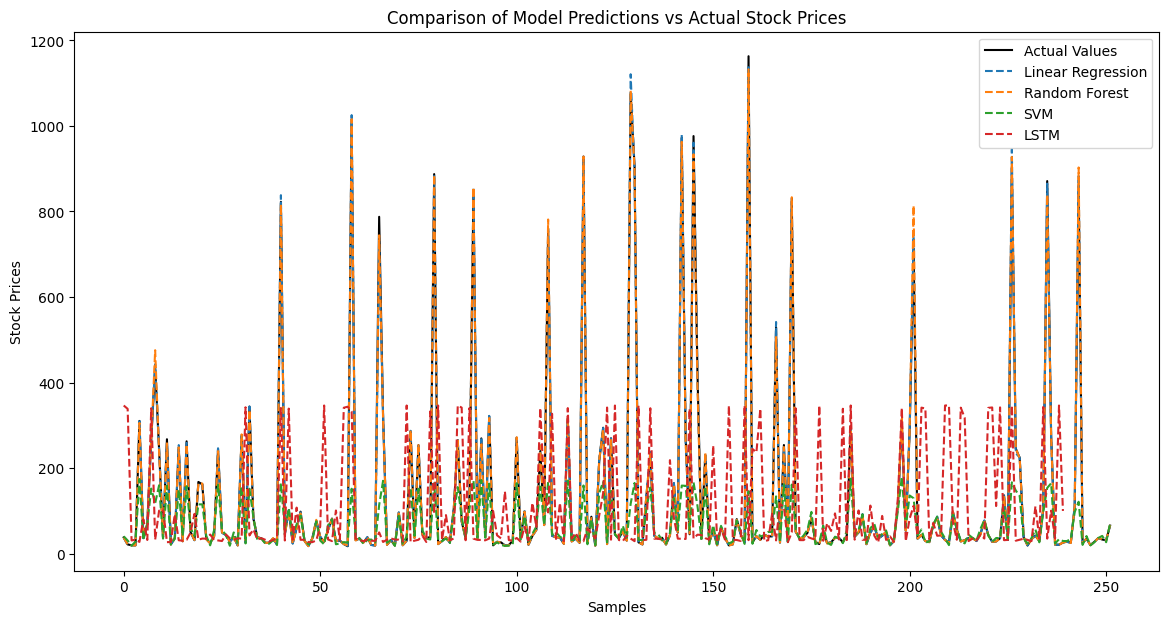

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Values', color='black')
plt.plot(y_pred_lr, label='Linear Regression', linestyle='--')
plt.plot(y_pred_rf, label='Random Forest', linestyle='--')
plt.plot(y_pred_svm, label='SVM', linestyle='--')
plt.plot(y_pred_lstm, label='LSTM', linestyle='--')
plt.title('Comparison of Model Predictions vs Actual Stock Prices')
plt.xlabel('Samples')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


In [ ]:
# Create a combined figure for all models
fig_combined = go.Figure()
fig_combined.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test.values, mode='lines', name='Actual Values'))
fig_combined.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_pred_lr, mode='lines', name='Linear Regression'))
fig_combined.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_pred_rf, mode='lines', name='Random Forest'))
fig_combined.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_pred_svm, mode='lines', name='SVM'))
fig_combined.add_trace(go.Scatter(x=list(range(len(y_test_lstm))), y=y_pred_lstm.flatten(), mode='lines', name='LSTM'))
fig_combined.update_layout(title='Comparison of Model Predictions vs Actual Stock Prices', xaxis_title='Samples', yaxis_title='Stock Prices')
fig_combined.show()
